# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. 
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)

    
### Задание

* подобрать оптимальное число кластеров
* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* визуализировать результаты голосования в районах
* приложить ноутбук




In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_excel('geo_comment.xlsx', engine='openpyxl', index_col = 'Unnamed: 0')
data

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
...,...,...,...,...,...
70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...
70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...
70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл..."
70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...


In [3]:
# выделение датафрейма с широтой и долготой для кластеризации по районам

data_xy = data[['x', 'y']]

Подбор оптимального числа кластеров

In [4]:
# The elbow method 
# Алгоритм KMeans выполняется для нескольких k, которое увеличиватся с каждой итерацией.
# Анализируется SSE

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

# Формирование списка содержащего SSE для каждого k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_xy)
    sse.append(kmeans.inertia_)

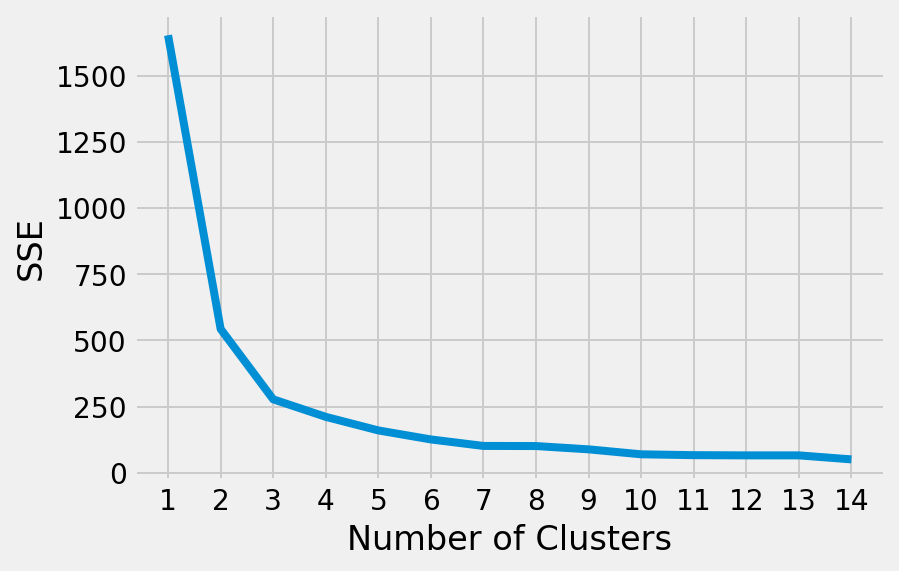

In [5]:
# исходя из графика k = 3

plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [6]:
# The silhouette coefficient
# Алгоритм KMeans выполняется для нескольких k (k >= 2), которое увеличиватся с каждой итерацией.
# Анализируется silhouette coefficient

# Формирование списка содержащего silhouette coefficient для каждого k
silhouette_coefficients = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_xy)
    score = silhouette_score(data_xy, kmeans.labels_)
    silhouette_coefficients.append(score)

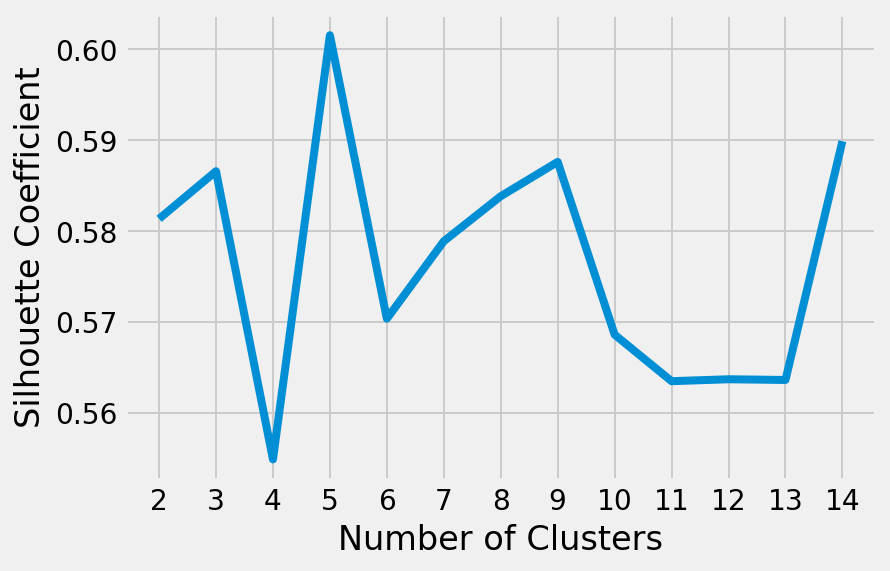

In [7]:
# исходя из графика k = 5

plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [8]:
# так как в Москве 12 районов, оптимальным будет n_clusters = 12
# для построения графика стоит выделить кластеры и центроиды

km = KMeans(n_clusters=12).fit(data_xy)
clusters = km.predict(data_xy)
centers = km.cluster_centers_

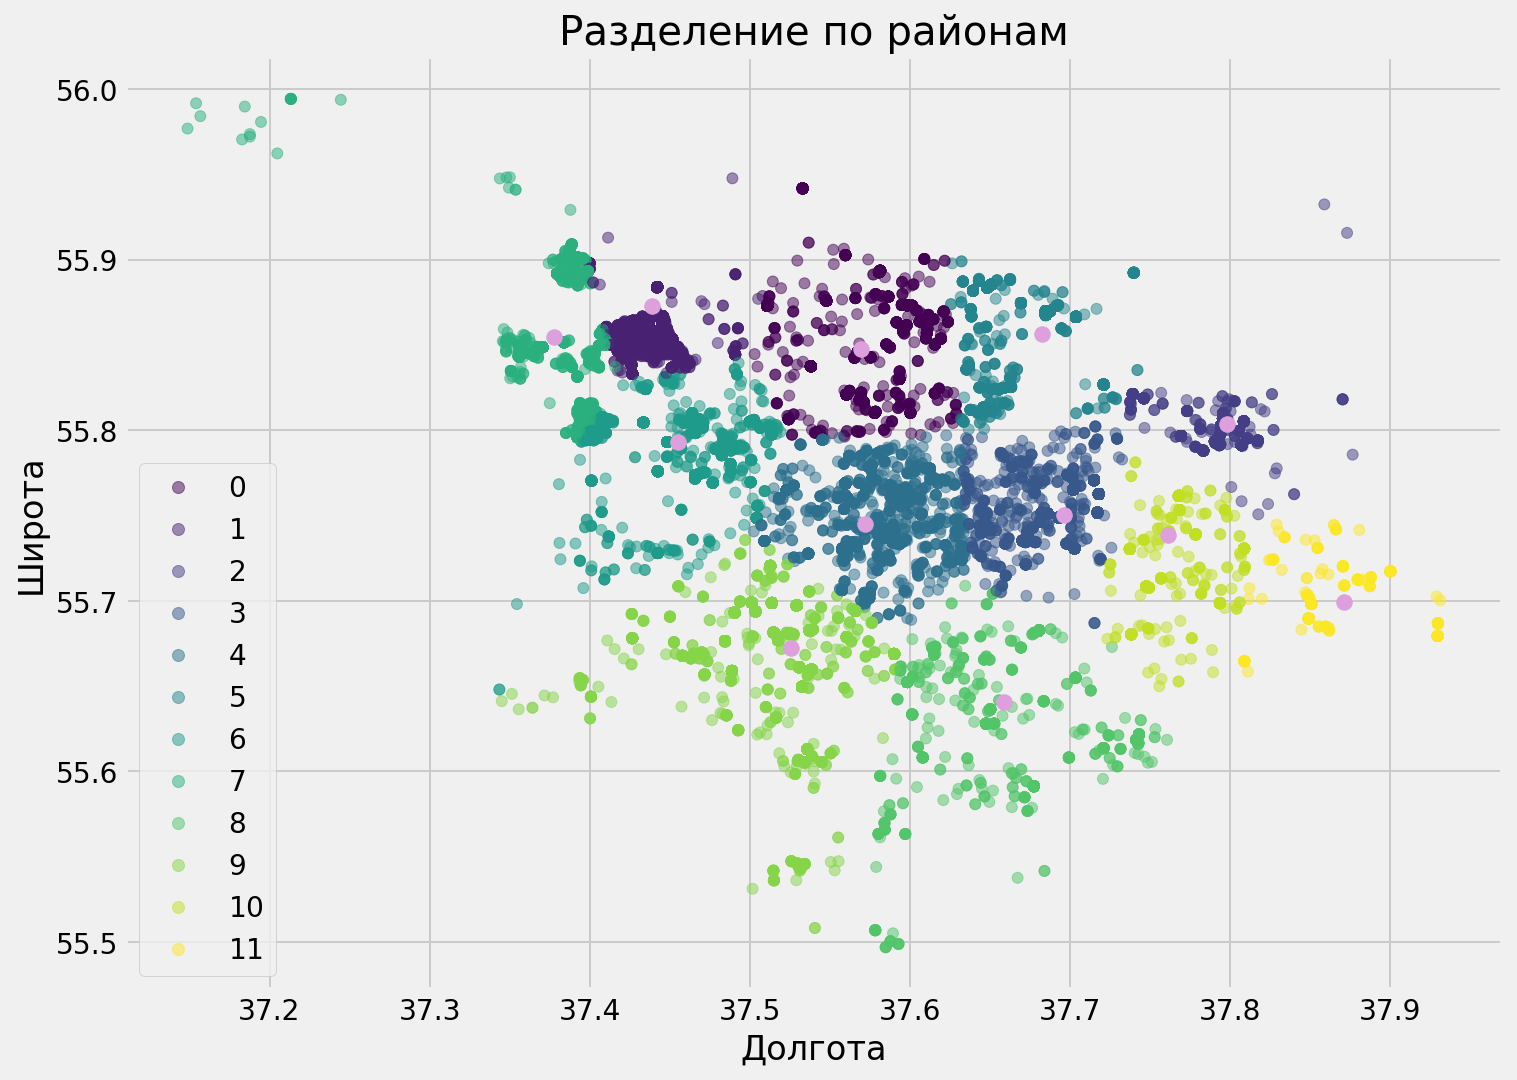

In [9]:
plt.figure(figsize=(11, 8))
reg = plt.scatter(data['x'], data['y'], c = clusters, s = 30, alpha = 0.5)
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title('Разделение по районам')
plt.scatter(centers[:, 0], centers[:, 1], c = '#DDA0DD', s = 60)
plt.legend(*reg.legend_elements(), loc='lower left');

In [10]:
# выделение датафрейма без комментариев

data_vot = data.drop('comment', axis = 1)

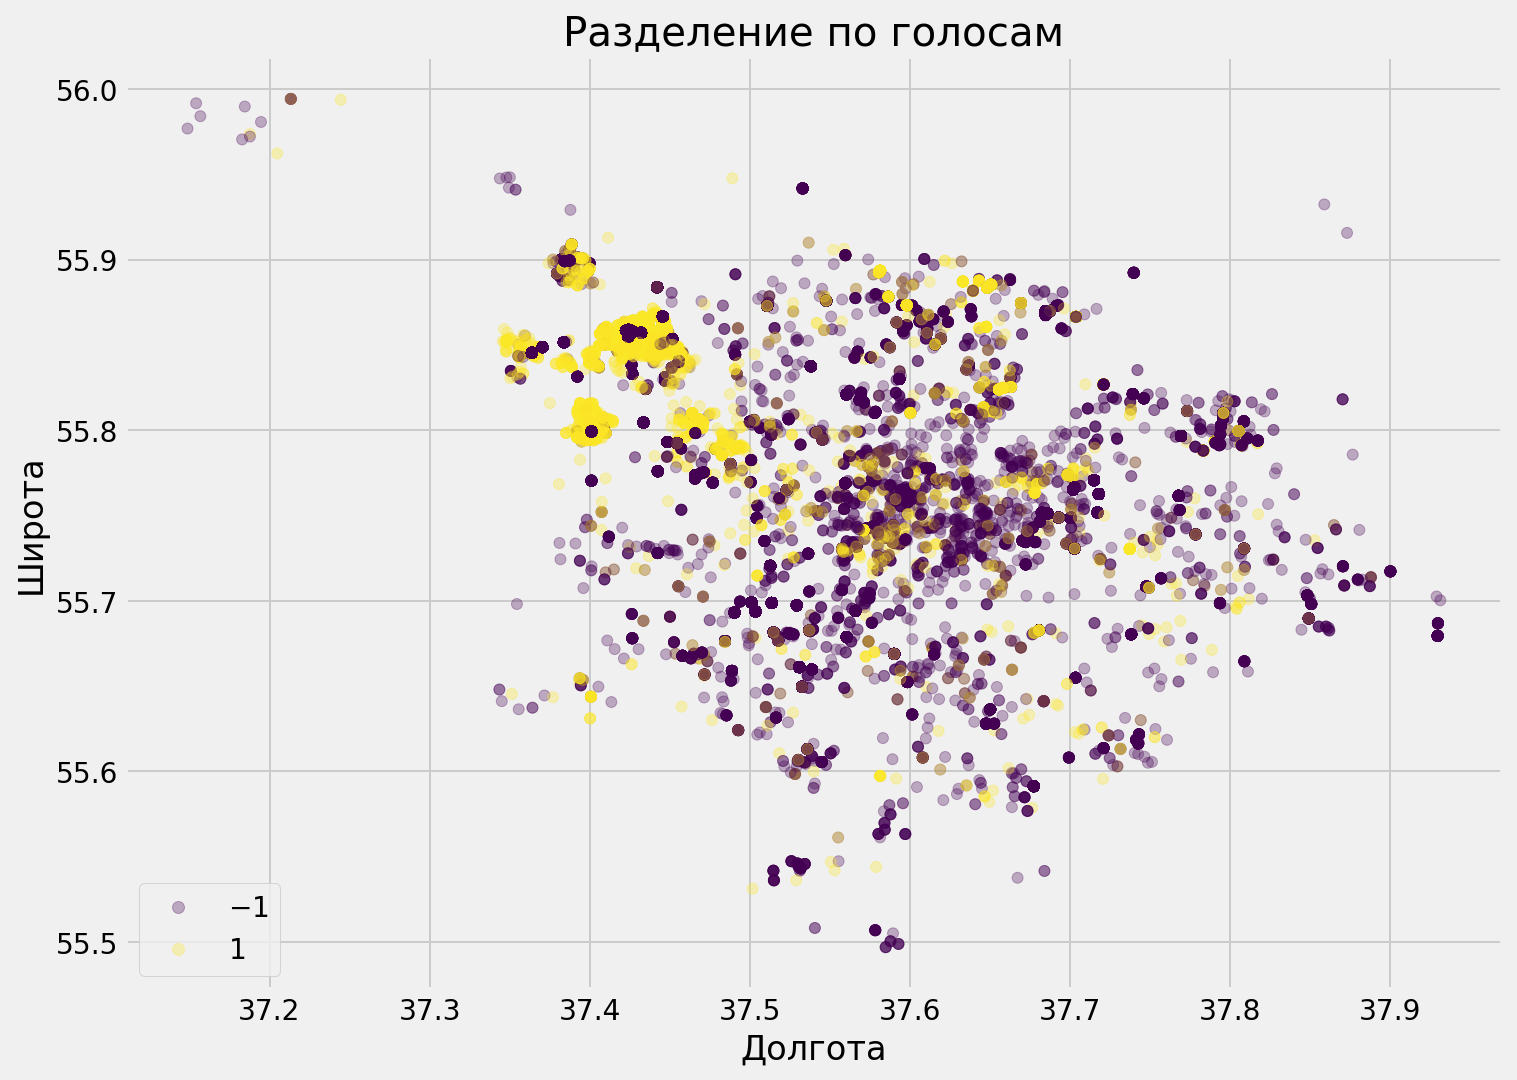

In [11]:
plt.figure(figsize=(11, 8))
vot = plt.scatter(data_vot['x'], data_vot['y'], c = data_vot['comment_class'], s = 30, alpha = 0.3)
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title('Разделение по голосам')
plt.legend(*vot.legend_elements(), loc='lower left');

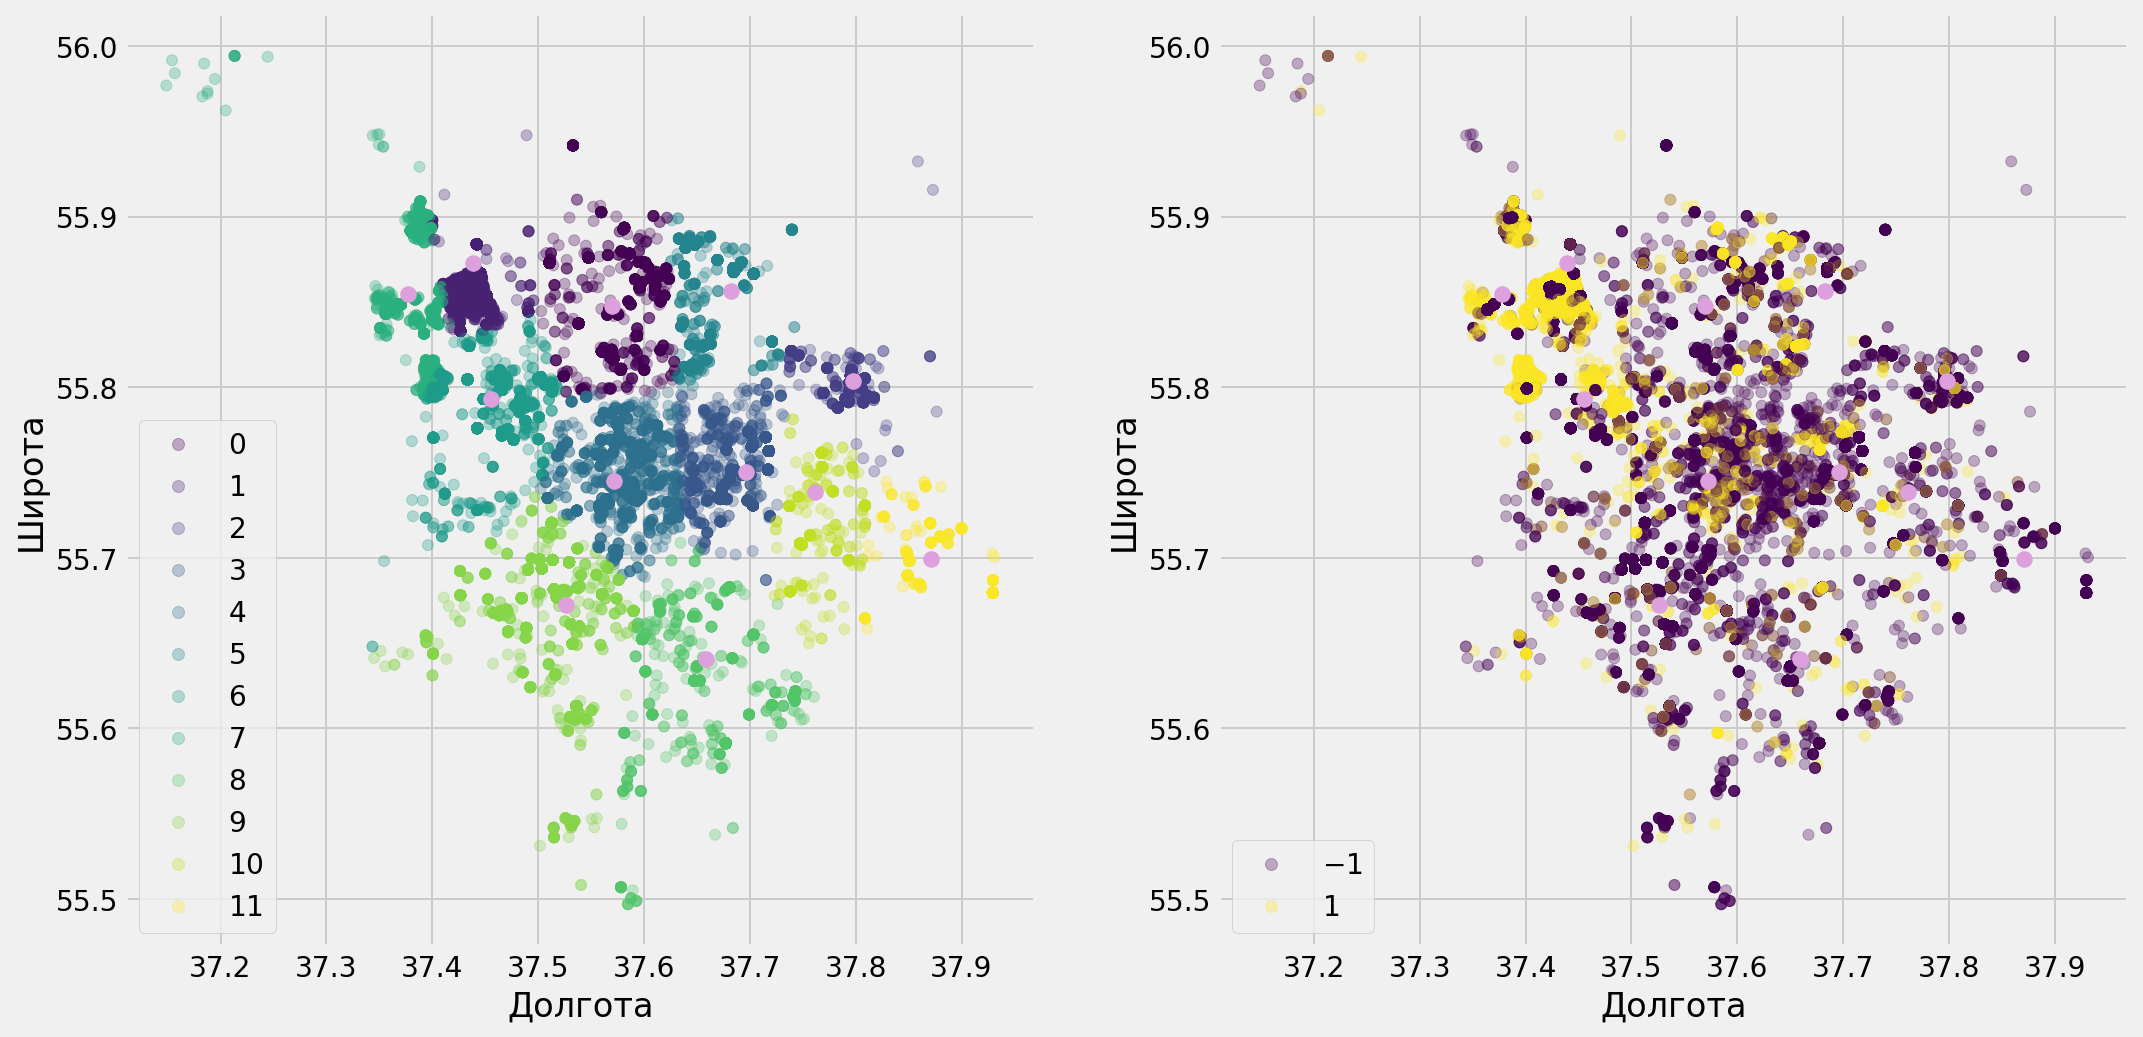

In [12]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
reg = plt.scatter(data['x'], data['y'], c = clusters, s = 30, alpha = 0.3)
plt.scatter(centers[:, 0], centers[:, 1], c = '#DDA0DD', s = 60)
plt.legend(*reg.legend_elements(), loc='lower left')
plt.xlabel("Долгота")
plt.ylabel("Широта")

plt.subplot(1, 2, 2)
vot = plt.scatter(data_vot['x'], data_vot['y'], c = data_vot['comment_class'], s = 30, alpha = 0.3)
plt.legend(*vot.legend_elements(), loc='lower left')
plt.scatter(centers[:, 0], centers[:, 1], c = '#DDA0DD', s = 60)
plt.xlabel("Долгота")
plt.ylabel("Широта");

In [13]:
# создание сводной таблицы для построения графика

data_vot['region'] = clusters
data_pt = data_vot.pivot_table(
                        index = 'region', 
                        columns = 'comment_class', 
                        values = 'multiplier', 
                        aggfunc = 'sum')

In [14]:
# переименование столбцов

data_pt.rename(columns = {-1: 'cons', 1: 'pros'}, inplace = True)

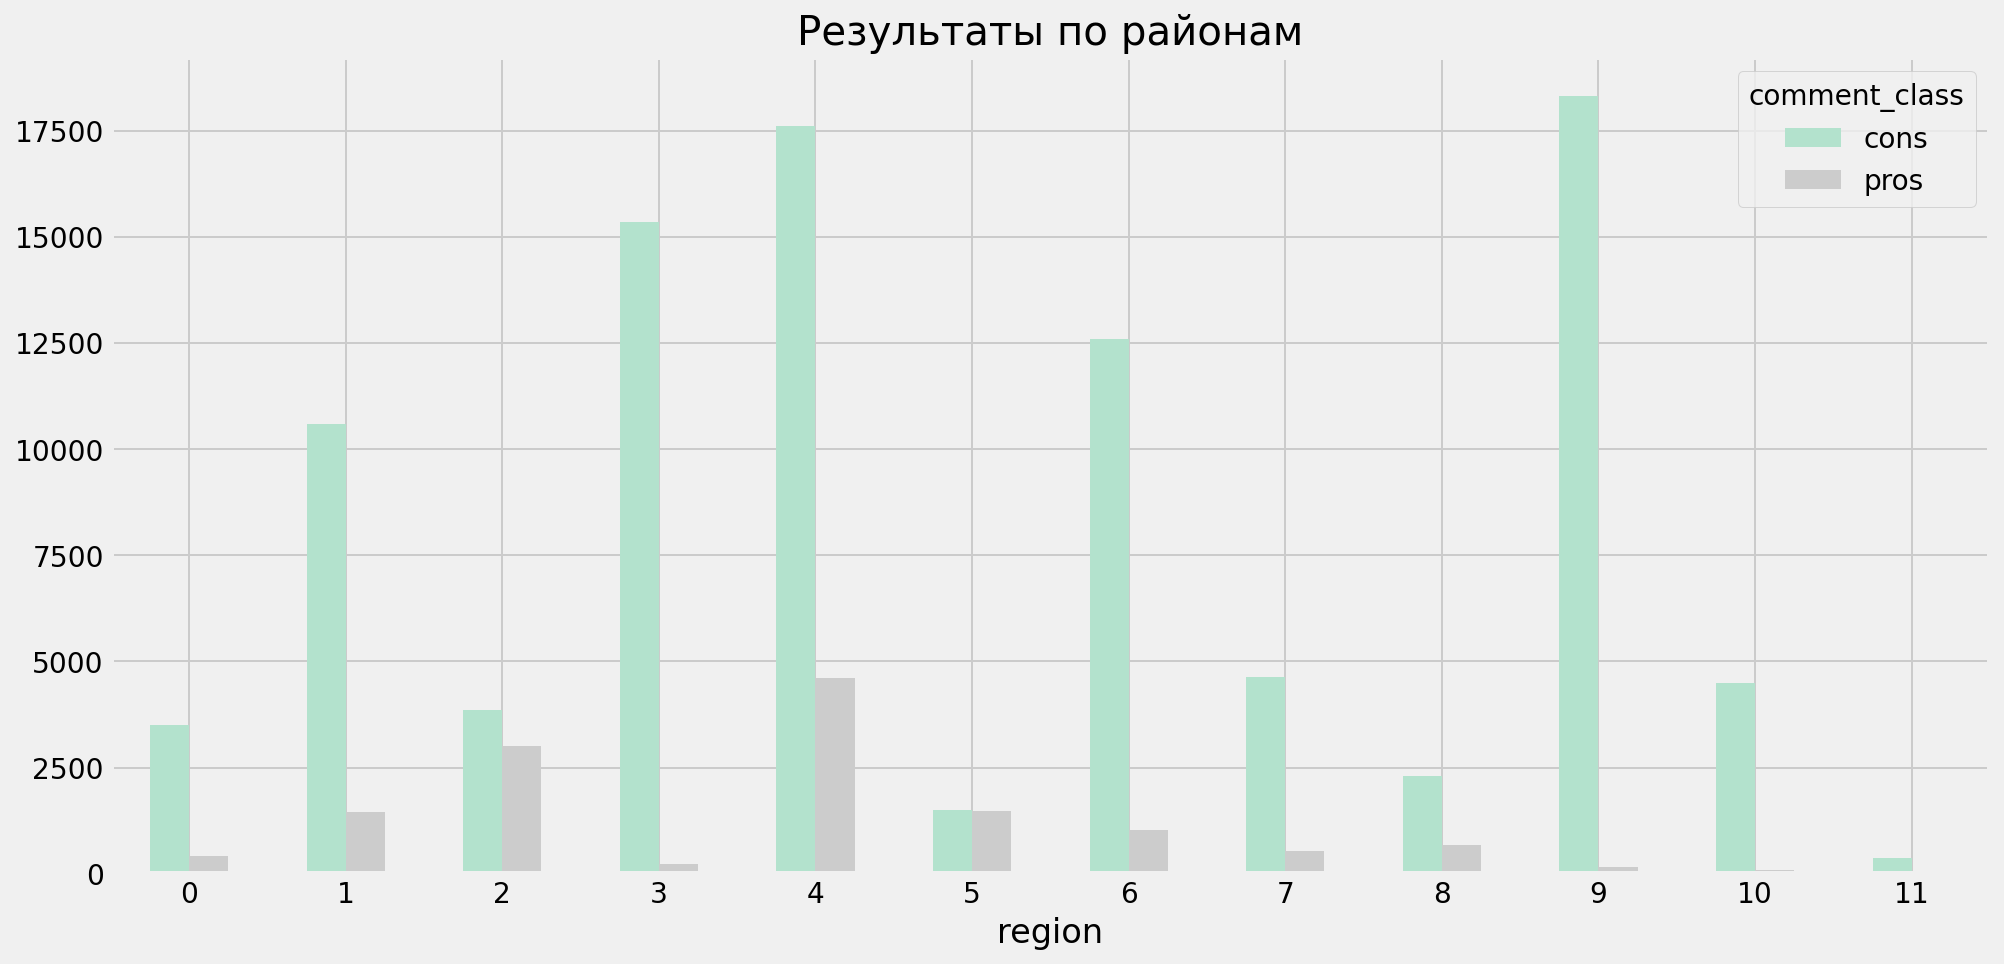

In [15]:
data_pt.plot(kind='bar', figsize = (15,7), rot = 0, colormap = 'Pastel2')
plt.title('Результаты по районам');